In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
monday = pd.read_csv('data/monday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
tuesday = pd.read_csv('data/tuesday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
wednesday = pd.read_csv('data/wednesday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])
thursday = pd.read_csv('data/thursday.csv', sep=';', parse_dates=['timestamp'], index_col=['timestamp'])
friday = pd.read_csv('data/friday.csv', sep=';', parse_dates=['timestamp'],index_col=['timestamp'])
df = pd.concat([monday, tuesday, wednesday, thursday, friday], axis=0)
df['day'] = df.index.day
df = df[['day', 'customer_no', 'location']]

In [3]:
conditions = [
    (df['location'] == "fruit"),
    (df['location'] == "spices"),
    (df['location'] == "dairy"),
    (df['location'] == "drinks"),
    ]

values = [4, 3, 5, 6]

df['revenue_per_minute'] = np.select(conditions, values)
df.head()

,day,customer_no,location,revenue_per_minute
timestamp,,,,
2019-09-02 07:03:00,2,1,dairy,5
2019-09-02 07:03:00,2,2,dairy,5
2019-09-02 07:04:00,2,3,dairy,5
2019-09-02 07:04:00,2,4,dairy,5
2019-09-02 07:04:00,2,5,spices,3


In [4]:
df.dtypes

day                    int64
customer_no            int64
location              object
revenue_per_minute     int64
dtype: object

In [5]:
df.shape

(24877, 4)

In [6]:
#df.head()
#df.tail()
# sns.countplot(data=df, x="location", hue="day")
cross_tab = pd.crosstab(df['customer_no'], df['location'])
cross_tab

location,checkout,dairy,drinks,fruit,spices
customer_no,,,,,
1,5,2,2,2,1
2,5,2,2,2,1
3,5,5,3,5,5
4,5,3,2,1,1
5,5,4,3,1,3
...,...,...,...,...,...
1531,2,0,2,0,1
1532,0,1,0,0,0
1533,0,1,0,0,0


In [7]:
# Calculate the total number of customers in each section

grouped_df = df.groupby(["day","location"])
grouped_df = grouped_df.agg({"customer_no": "nunique"})
grouped_df = grouped_df.reset_index()
grouped_df

,day,location,customer_no
0,2,checkout,1437
1,2,dairy,720
2,2,drinks,661
3,2,fruit,827
4,2,spices,584
5,3,checkout,1420
6,3,dairy,751
7,3,drinks,581
8,3,fruit,827
9,3,spices,543


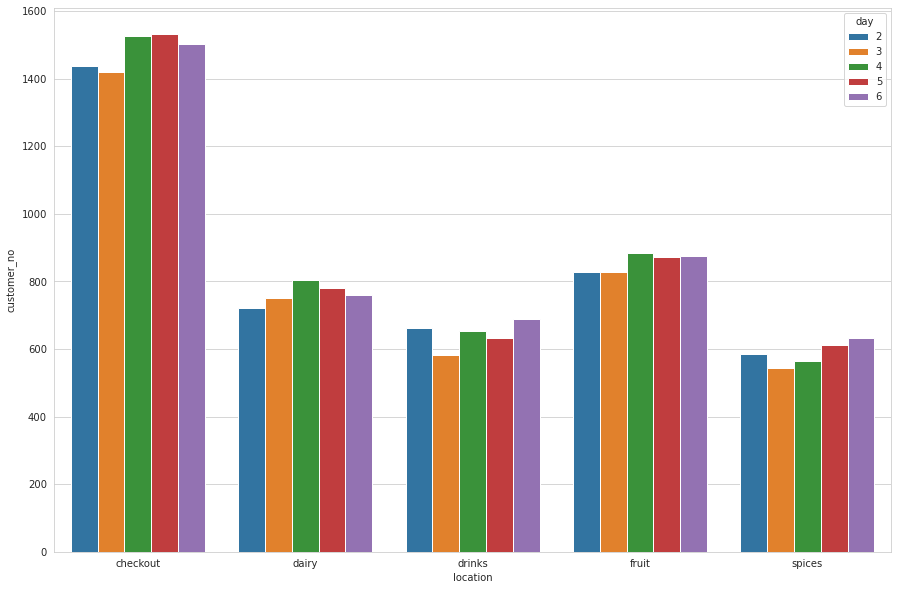

In [8]:
plt.figure(figsize=(15, 10))
sns.barplot(data = grouped_df, x="location", y = "customer_no", hue="day");